# Analisi - parte 1

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Importazione dati - Full dataset, non ci serve geolocalizzazione

In [4]:
df=pd.read_csv("../data/after_preprocessing/after_preprocessing.csv", sep=",", encoding="iso8859_1")

D:\Installed\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df

,Unnamed: 0,anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,...,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
0,89310,16,15,146,6,2,1,,12,2,...,0,0,0,0,3,"Via della Chiesa Rossa, palo luce 160 ...",22,0,0,2
1,93706,16,15,146,5,1,1,000,12,2,...,0,0,0,0,1,STRADA URBANA ...,11,0,0,1
2,93711,16,15,146,7,1,7,R20,,1,...,0,0,0,0,3,SVINCOLO A4 - MILANO VIALE CERTOSA ...,19,0,800,1
3,93715,16,15,146,3,1,7,R36,,1,...,0,0,0,0,1,A50 - SVINCOLO CON COLLEGAMENTO SS11-33 ...,9,0,700,1
4,93725,16,15,146,4,1,5,046,12,3,...,0,0,0,0,1,STRADA PROVINCIALE 46 ...,9,4,400,1
5,93749,16,15,146,6,1,7,R20,,1,...,0,0,0,0,2,SVINCOLO A4 - MILANO VIALE CERTOSA ...,24,0,100,2
6,93768,16,15,146,3,1,7,R20,,1,...,0,0,0,0,2,SVINCOLO A4 - MILANO VIALE CERTOSA ...,20,0,500,2
7,93776,16,15,146,2,1,4,000,12,3,...,0,0,0,0,1,STRADA COMUNALE ...,20,0,1,2
8,93781,16,15,146,1,1,7,A04,,1,...,0,0,0,0,1,SVINCOLO A4 - MILANO VIALE CERTOSA ...,12,126,300,2
9,93787,16,15,146,3,1,7,R20,,1,...,0,0,0,0,1,SVINCOLO A4 - MILANO VIALE CERTOSA ...,21,0,500,3


## Plot numero incidentii in funzione del giorno della settimana (1=domenica, 7=sabato)

D:\Installed\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


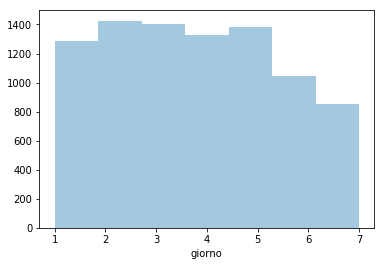

In [7]:
sns.distplot(df['giorno'], bins=7, kde=False)

In [8]:
# PLOT NUMERO INCIDENTI IN FUNZIONE DELL'ORA

D:\Installed\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


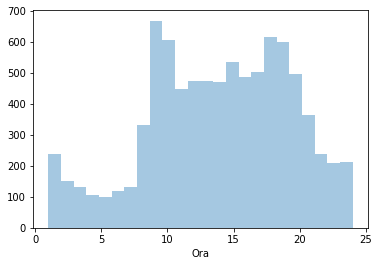

In [9]:
sns.distplot(df['Ora'], bins=24, kde=False)

## Plot numero incidenti in funzione della notte - Versione 20-04, 22-04

In [11]:
df['Progressivo_orario'] = (df.giorno-1)*24 + df.Ora

In [12]:
def correzione_orario(x):
    if x <5: 
        out = x + 24*7
    else:
        out= x
    return out

In [13]:
df['Progressivo_orario'] = df['Progressivo_orario'].apply(correzione_orario)

D:\Installed\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


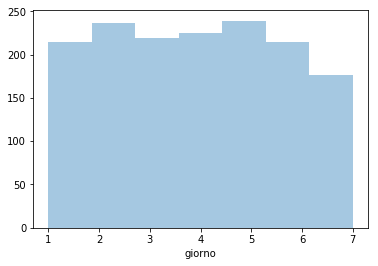

In [14]:
sns.distplot(df['giorno'][(df['Progressivo_orario']>=(df['giorno']-1)*24+20) & (df['Progressivo_orario']<=(df['giorno']-1)*24+28)], bins=7, kde=False)

D:\Installed\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


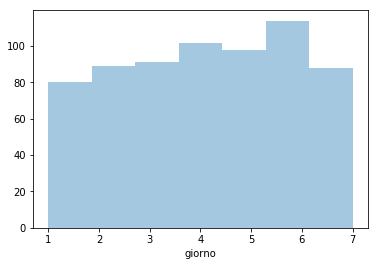

In [15]:
sns.distplot(df['giorno'][(df['Progressivo_orario']>=(df['giorno']-1)*24+22) & (df['Progressivo_orario']<=(df['giorno']-1)*24+22+6)], bins=7, kde=False)

## TRIMESTRI

D:\Installed\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


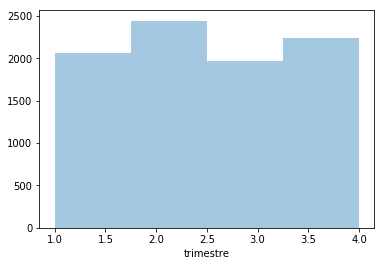

In [17]:
sns.distplot(df['trimestre'], bins=4, kde=False)

## FERITI

D:\Installed\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


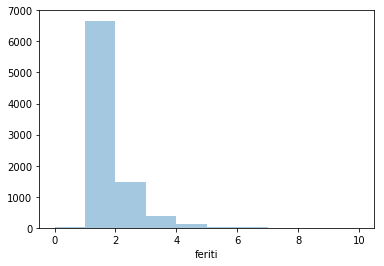

In [19]:
sns.distplot(df['feriti'], bins=10, kde=False)

In [20]:
# FONDO_STRADALE
# 1 = ASCIUTTO
# 2 = BAGNATO

(array([7.015e+03, 1.656e+03, 4.100e+01, 8.000e+00, 2.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

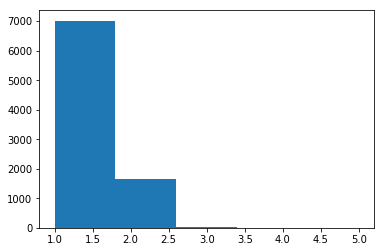

In [31]:
plt.hist(df['fondo_stradale'], bins=5)

## MORTI TOTALI

In [ ]:
df['morti_totali']=df['morti_entro_24_ore']+df['morti_entro_30_giorni']

In [ ]:
sns.distplot(df['morti_totali'], bins=3, kde=False)